# System tools to herd the dumps into something useful

In [1]:
%pylab nbagg

import os
import re

from topas2numpy import read_ntuple
from datetime import datetime
from pylab import figure, cm
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


## Making a new analysis directory

In [9]:
now = datetime.now()

dt_string = now.strftime("%Y-%m-%d-h%Hm%M")

print(dt_string)

os.mkdir(f'analysis/{dt_string}')

2020-10-16-h14m21


In [2]:
dt_string = '2020-08-27-h11m00'

## Reformat the dump

In [67]:
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.csv
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.phsp
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.header

In [3]:
!echo 'Remaking the kernels to get one third voxel size' > ./analysis/2020-08-27-h09m13/Readme

In [4]:
!cat *.csv | awk 'NR % 6 == 0' > deposition2.txt
!ls *.csv | grep -o '[0-9][0-9]*' > energies.txt

In [7]:
#!cat energies.txt deposition.txt
#!cat deposition.txt

energies = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

with open('deposition.txt') as f:
    array = np.array([[x for x in line.split()] for line in f]).flatten()
    deposition = array.astype(np.float)

deposition_summed = np.array([sum(deposition[ii:ii-625:-1]) for ii in range(deposition.size,0,-625)])

# np.save(f'analysis/{dt_string}/EnergyDeposition.npy',[deposition_summed[-2::-1],energies])

<IPython.core.display.Javascript object>


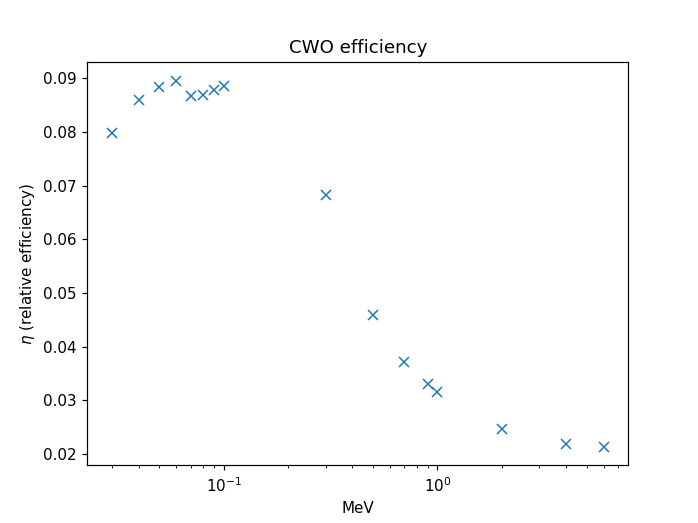

Text(0.5, 1.0, 'CWO efficiency')

In [8]:
plt.figure()
plt.semilogx(energies/1000,(deposition_summed[-2::-1]/(energies/1000))/1000000,'x')
plt.xlabel('MeV')
plt.ylabel('$\eta$ (relative efficiency)')
# plt.savefig(f'analysis/{dt_string}/EnergyDeposition.png')
plt.title('CWO efficiency')

<IPython.core.display.Javascript object>


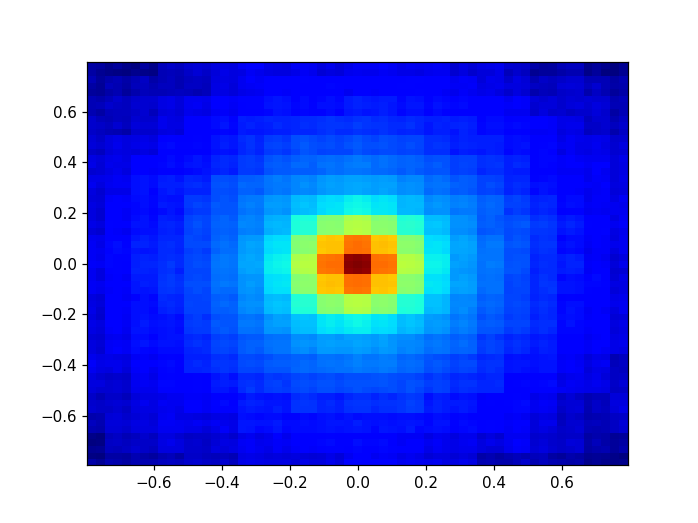

In [8]:
rootdir = "."
regex = re.compile('(.*.phsp$)|(.*rar$)|(.*r01$)')

phase_spaces = []
plt.figure()

# edges_forward = (np.arange(0.0196,41*0.0392,0.0392))

# edges_forward = (np.arange(0.0168,41*0.0336,0.0336))

# edges_forward = (np.arange(0.001,151*0.002,0.002))

# edges_forward = (np.arange(0.0392,13*0.0784,0.0784))

# edges_forward = (np.arange(0.0196,26*0.0392,0.0392))

edges_forward = (np.arange(0.0261/2,31*0.0261,0.0261))

edges = np.hstack([-1*edges_forward[-1::-1], edges_forward])

xedges = edges #np.linspace(-2,2,201) # Changed from 82 JO 2020 07
yedges = edges #np.linspace(-2,2,201) # Changed from 40 JO 08

for root, dirs, files in os.walk(rootdir):
    for file in sorted(files)[:658]:
        if regex.match(file):
                        
            y = read_ntuple(file)

            h,xs,yx,ima = plt.hist2d(y['Local position X [cm]'],y['Local position Y [cm]'], bins = [xedges,yedges], cmap=cm.jet, norm=LogNorm())
#             plt.title(f'{file}')
            plt.savefig(f'analysis/{dt_string}/{file}.png')
            
            np.save(f'analysis/{dt_string}/{file}',h)
            

<IPython.core.display.Javascript object>


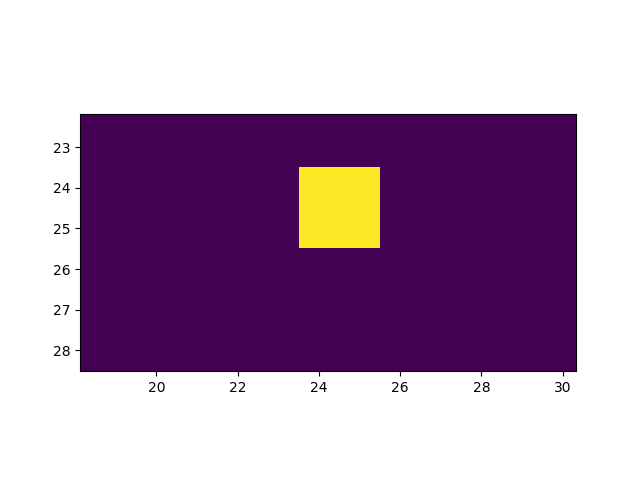

In [22]:
plt.figure()
plt.imshow(np.load('analysis/2020-06-06-h10m44/PhotodiodeSurface-0050keV.phsp.npy'))

<IPython.core.display.Javascript object>


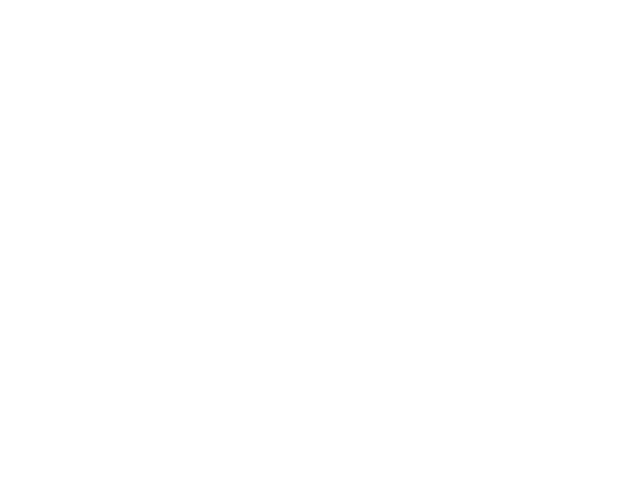

PhotodiodeSurface-6000keV.phsp


In [20]:
rootdir = "."
regex = re.compile('(.*phsp$)|(.*rar$)|(.*r01$)')

phase_spaces = []
plt.figure()

xedges = np.linspace(-1.5876,1.5876,82)
yedges = np.linspace(-1.5876,1.5876,82)

n = 0
for root, dirs, files in os.walk(rootdir):
    for file in sorted(files,reverse=True):
        if regex.match(file):
            
            print(file)
            
            y = read_ntuple(file)
            
            for ii in range(10000):
                
                xx = [y[kk][0] for kk in range(n,n+10000)]
                yy = [y[kk][1] for kk in range(n,n+10000)]
                
                if ii == 0:
                    h,xs,yx = np.histogram2d(xx,yy, bins = [xedges,yedges])
                else:
                    h2,xs,yx = np.histogram2d(xx,yy, bins = [xedges,yedges])
                    
                    h += h2

    #             plt.title(f'{file}')
    #             plt.savefig(f'analysis/{dt_string}/{file}.png')

#                 np.save(f'analysis/{dt_string}/{file}',h)

                n += 10000
            
            break

In [64]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = sorted(glob.glob("analysis/2020-06-04-h08m58/*.png"))

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [19]:
xx = np.array([y[kk][0] for kk in range(y.size)])
yy = np.array([y[kk][1] for kk in range(y.size)])

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


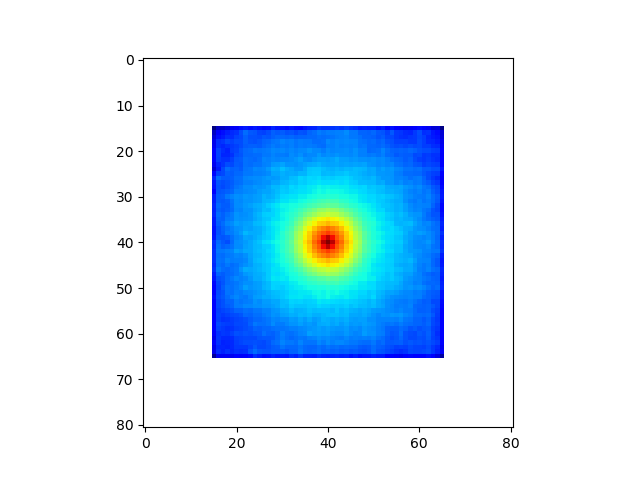

In [21]:
file = 'PhotodiodeSurface-6000keV.phsp'

plt.figure()
plt.imshow(h, cmap=cm.jet, norm=LogNorm())
plt.savefig(f'analysis/{dt_string}/{file}.png')

np.save(f'analysis/{dt_string}/{file}',h)

In [14]:
file

'EnergyDeposition.png'

In [37]:
im = np.load('analysis/2020-06-06-h10m44/PhotodiodeSurface-0030keV.phsp.npy')

<IPython.core.display.Javascript object>


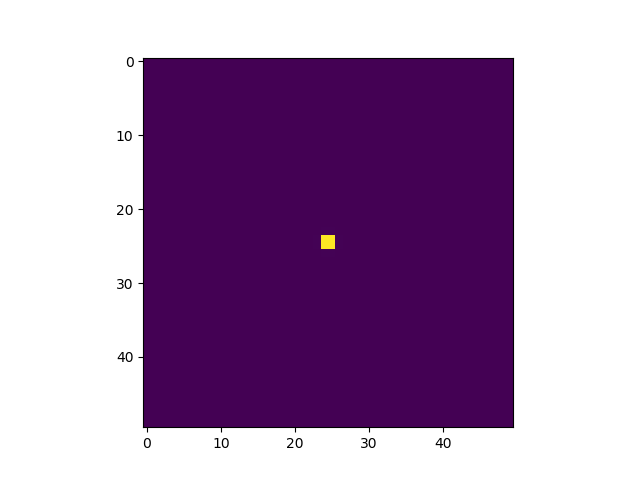

In [38]:
plt.figure()
plt.imshow(im)